In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import numpy as np

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df.iloc[0]
df[0].value_counts()

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
cauliflower            1
ketchup                1
cream                  1
body spray             1
oatmeal                1
Name: 0, Length: 115, dtype: int64

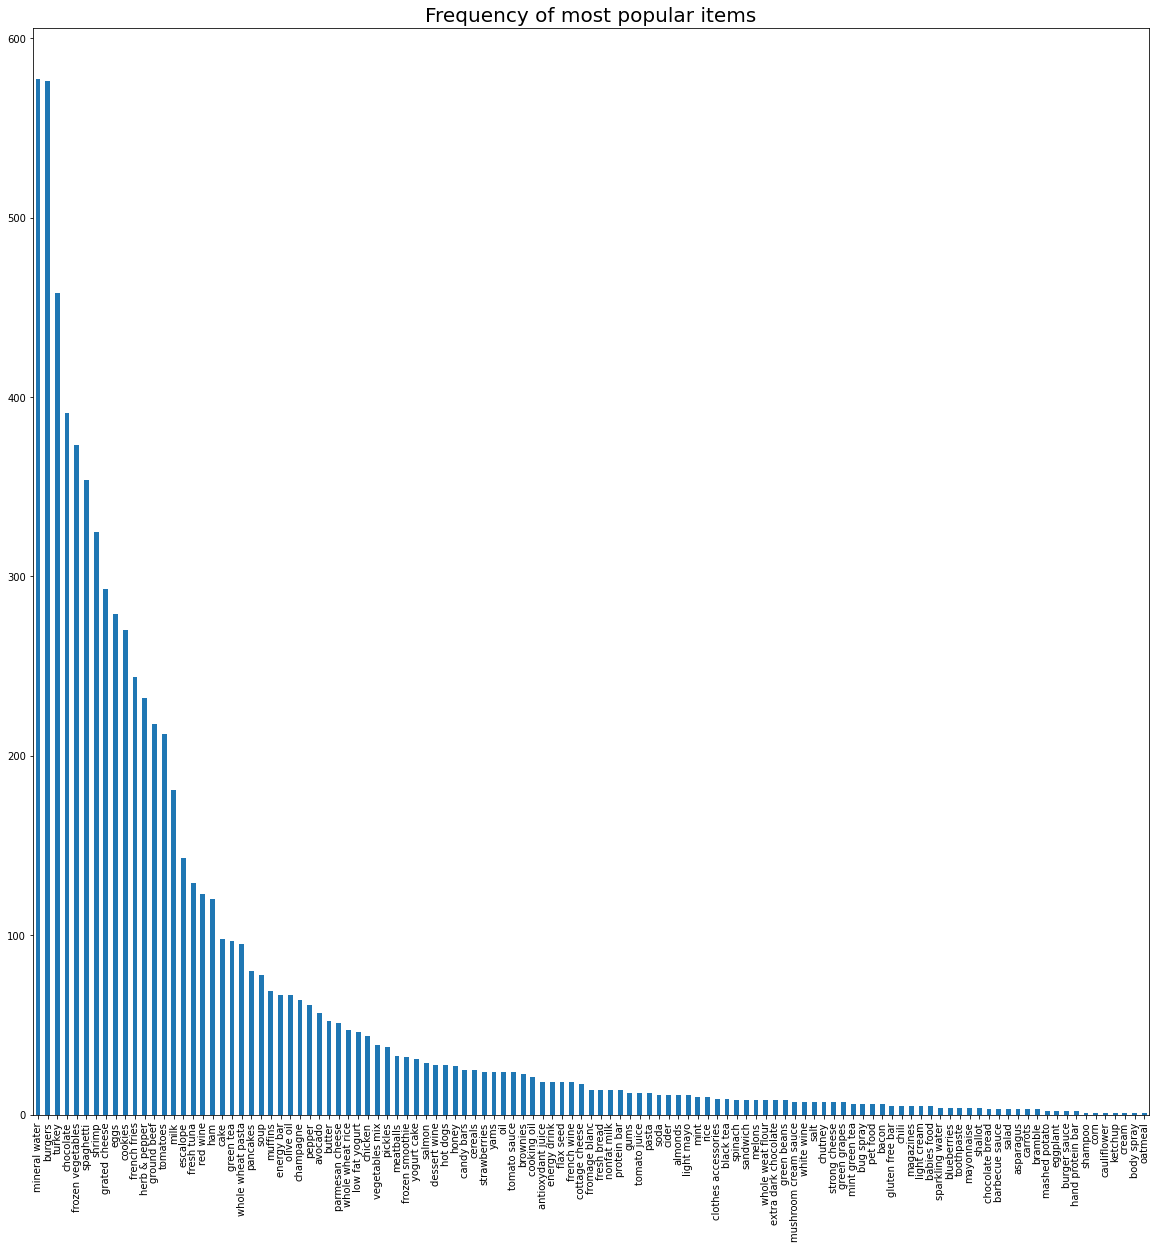

In [5]:
df[0].value_counts().plot.bar(figsize=(20,20))
plt.title('Frequency of most popular items',fontsize=20)
plt.show()

In [6]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [7]:
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [8]:
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, 20) if str(df.values[i,j])!='nan'])
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [9]:
rules = apriori(transactions,min_support=0.003,min_confidence=0.01,min_lift=3,min_length=2)
values = list(rules)
values

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [10]:
list = []

In [11]:
# for item in values:
#     pair = item[0]
#     items = [x for x in pair]
#     print(pair)
#     print(items)

In [12]:
# for item in values:
#     print("0      :  ",item)
#     print("1     :   ",item[2])
#     print("2     :   ",item[2][0])
#     print("3     :   ",item[2][0][2])
#     print("4     :   ",item[2][0][3])
#     print("---------------")

In [13]:
for item in values:
    pair = item[0]
    items = [x for x in pair]
    list.append([str(items[0]+" -> " + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
list

[['brownies -> cottage cheese',
  '0.0034662045060658577',
  '0.10276679841897232',
  '3.225329518580382'],
 ['chicken -> light cream',
  '0.004532728969470737',
  '0.07555555555555556',
  '4.843950617283951'],
 ['mushroom cream sauce -> escalope',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['pasta -> escalope',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['tomato juice -> fresh bread',
  '0.004266097853619517',
  '0.09907120743034055',
  '3.2593558198902826'],
 ['fresh tuna -> honey',
  '0.003999466737768298',
  '0.17964071856287428',
  '3.7850703088205613'],
 ['honey -> fromage blanc',
  '0.003332888948140248',
  '0.2450980392156863',
  '5.164270764485569'],
 ['ground beef -> herb & pepper',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['tomato sauce -> ground beef',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['olive oil -> light cream',
  '0.00319957339021

In [14]:
table = pd.DataFrame(list,columns=['Rule','Support','Confidence','Lift'])

In [15]:
table

,Rule,Support,Confidence,Lift
0,brownies -> cottage cheese,0.0034662045060658577,0.10276679841897232,3.225329518580382
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
2,mushroom cream sauce -> escalope,0.005732568990801226,0.0722689075630252,3.7908326967150496
3,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
4,tomato juice -> fresh bread,0.004266097853619517,0.09907120743034055,3.2593558198902826
...,...,...,...,...
89,spaghetti -> ground beef,0.0030662578322890282,0.21100917431192662,3.532990661861075
90,ground beef -> tomatoes,0.0030662578322890282,0.03120759837177748,3.344117076952898
91,milk -> spaghetti,0.003332888948140248,0.05060728744939272,3.216993755575379
92,milk -> spaghetti,0.0030662578322890282,0.0638888888888889,3.014028651292803


In [16]:
table.sort_values(by=['Support'],ascending=False)

,Rule,Support,Confidence,Lift
7,ground beef -> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
30,ground beef -> frozen vegetables,0.008665511265164644,0.08819538670284939,3.165328208890303
51,soup -> milk,0.008532195707239034,0.16886543535620052,3.518498973907945
10,whole wheat pasta -> olive oil,0.007998933475536596,0.12145748987854252,4.1224100976422955
34,frozen vegetables -> shrimp,0.007199040127982935,0.07552447552447553,3.2006163328197226
...,...,...,...,...
41,green tea -> ground beef,0.0030662578322890282,0.04483430799220273,3.0297490472929067
49,tomato sauce -> ground beef,0.0030662578322890282,0.03120759837177748,4.980599901844742
55,milk -> tomatoes,0.0030662578322890282,0.02366255144032922,3.4133230452674903
62,whole wheat rice -> tomatoes,0.0030662578322890282,0.04483430799220273,3.1726617382029496


In [17]:
table.sort_values(by=['Confidence'],ascending=False)

,Rule,Support,Confidence,Lift
11,pasta -> shrimp,0.005065991201173177,0.3220338983050847,4.506672147735896
6,honey -> fromage blanc,0.003332888948140248,0.2450980392156863,5.164270764485569
89,spaghetti -> ground beef,0.0030662578322890282,0.21100917431192662,3.532990661861075
50,spaghetti -> mineral water,0.003199573390214638,0.20512820512820515,3.4345238095238098
9,olive oil -> light cream,0.003199573390214638,0.20512820512820515,3.1147098515519573
...,...,...,...,...
75,milk -> frozen vegetables,0.0037328356219170776,0.02880658436213992,3.177620430888405
53,milk -> olive oil,0.0035995200639914677,0.02777777777777778,3.1098673300165838
12,milk -> avocado,0.003332888948140248,0.025720164609053502,3.2154492455418384
52,milk -> shrimp,0.003199573390214638,0.02469135802469136,3.0362274843149164


In [18]:
table.sort_values(by=['Lift'],ascending=False)

,Rule,Support,Confidence,Lift
58,whole wheat pasta -> olive oil,0.0038661511798426876,0.058704453441295545,6.115862573099415
6,honey -> fromage blanc,0.003332888948140248,0.2450980392156863,5.164270764485569
49,tomato sauce -> ground beef,0.0030662578322890282,0.03120759837177748,4.980599901844742
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
3,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
...,...,...,...,...
70,spaghetti -> frozen vegetables,0.0041327822956939075,0.1802325581395349,3.0176884343853825
92,milk -> spaghetti,0.0030662578322890282,0.0638888888888889,3.014028651292803
36,frozen vegetables -> spaghetti,0.005999200106652446,0.08395522388059701,3.013148968078269
71,milk -> ground beef,0.003332888948140248,0.14450867052023122,3.0109987154784847


In [19]:
pd.DataFrame(values)

,items,support,ordered_statistics
0,"(brownies, cottage cheese)",0.003466,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(chicken, light cream)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(mushroom cream sauce, escalope)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(pasta, escalope)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(tomato juice, fresh bread)",0.004266,"[((fresh bread), (tomato juice), 0.09907120743..."
...,...,...,...
89,"(spaghetti, ground beef, pancakes, mineral water)",0.003066,"[((ground beef, pancakes), (spaghetti, mineral..."
90,"(ground beef, tomatoes, spaghetti, mineral water)",0.003066,"[((ground beef), (tomatoes, spaghetti, mineral..."
91,"(milk, spaghetti, olive oil, mineral water)",0.003333,"[((olive oil), (milk, spaghetti, mineral water..."
92,"(milk, spaghetti, shrimp, mineral water)",0.003066,"[((milk, mineral water), (spaghetti, shrimp), ..."


In [20]:
pd.DataFrame(values).sort_values(by=['support'],ascending=False)

,items,support,ordered_statistics
7,"(ground beef, herb & pepper)",0.015998,"[((ground beef), (herb & pepper), 0.1628222523..."
30,"(ground beef, frozen vegetables, spaghetti)",0.008666,"[((ground beef), (frozen vegetables, spaghetti..."
51,"(soup, milk, mineral water)",0.008532,"[((soup), (milk, mineral water), 0.16886543535..."
10,"(whole wheat pasta, olive oil)",0.007999,"[((olive oil), (whole wheat pasta), 0.12145748..."
34,"(frozen vegetables, shrimp, mineral water)",0.007199,"[((frozen vegetables), (shrimp, mineral water)..."
...,...,...,...
41,"(green tea, ground beef, tomatoes)",0.003066,"[((tomatoes), (green tea, ground beef), 0.0448..."
49,"(tomato sauce, ground beef, spaghetti)",0.003066,"[((ground beef), (tomato sauce, spaghetti), 0...."
55,"(milk, tomatoes, soup)",0.003066,"[((milk), (tomatoes, soup), 0.0236625514403292..."
62,"(whole wheat rice, tomatoes, spaghetti)",0.003066,"[((tomatoes), (whole wheat rice, spaghetti), 0..."
